#I am looking for a job in Canada, where's the best place?

When Canada is mentioned, people often think of job opportunities, high incomes, and technology.

In this analysis, a government database of Canada will be examined. This will help in making a decision about which province to choose for relocation and job applications.

The analysis will primarily focus on the year 2019.

If you wish to explore the other analyses, please refer to the provided "https://github.com/Yaelllll/Portfolio_Data"

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick

In [100]:
df = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/7. Jobs-Graduated Canada/Canada_Jobs_1976-2019.csv')

In [101]:
df.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,1976-01,Full-time employment,Both sexes,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      4743 non-null   object 
 1   variable                   4743 non-null   object 
 2   sex                        4743 non-null   object 
 3   Alberta                    4743 non-null   float64
 4   British Columbia           4743 non-null   float64
 5   Manitoba                   4743 non-null   float64
 6   New Brunswick              4743 non-null   float64
 7   Newfoundland and Labrador  4743 non-null   float64
 8   Nova Scotia                4743 non-null   float64
 9   Ontario                    4743 non-null   float64
 10  Prince Edward Island       4743 non-null   float64
 11  Quebec                     4743 non-null   float64
 12  Saskatchewan               4743 non-null   float64
dtypes: float64(10), object(3)
memory usage: 481.8+ K

In [103]:
df['year'] = df['month'].str[:4]
df['year'] = df['year'].astype(int)

In [104]:
df['year'].unique()

array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [105]:
df.head(2)

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,year
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5,1976
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9,1976


In [106]:
df['sex'].unique()

array(['Both sexes', 'Females', 'Males'], dtype=object)

In [107]:
df_acrosstime = df.groupby('year').sum().reset_index()
df_acrosstime['Total_Jobs'] = df_acrosstime['Alberta'] + df_acrosstime['British Columbia'] + df_acrosstime['Manitoba'] + df_acrosstime['New Brunswick'] + df_acrosstime['Newfoundland and Labrador'] + df_acrosstime['Nova Scotia'] + df_acrosstime['Ontario'] + df_acrosstime['Prince Edward Island'] + df_acrosstime['Quebec'] + df_acrosstime['Saskatchewan']

<ipython-input-107-79c6d6010268>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_acrosstime = df.groupby('year').sum().reset_index()


In [108]:
df_acrosstime.head(3)

,year,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Total_Jobs
0,1976,41078.5,50946.0,20856.4,11097.0,7642.5,14306.4,179584.3,2063.3,122171.3,18345.1,468090.8
1,1977,43409.5,52303.9,21030.9,10950.4,7723.6,14310.1,182602.9,2090.9,122782.2,18981.9,476186.3
2,1978,46088.0,54634.5,21330.9,11480.6,7975.4,14682.5,188370.4,2150.5,124723.0,19351.7,490787.5


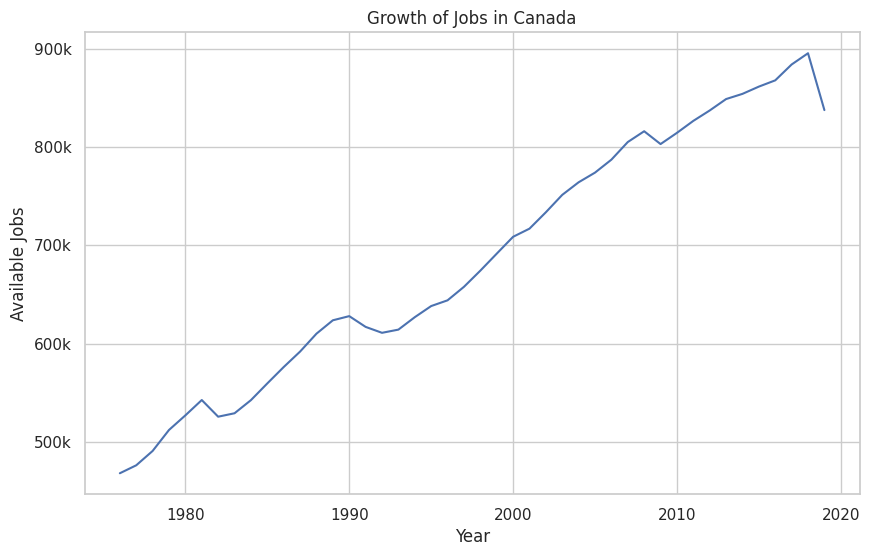

In [109]:
plt.figure(figsize=(10, 6))

# Convert the y-axis labels to thousands format
def format_thousands(x, pos):
    return f'{x / 1000:.0f}k'

plt.plot(df_acrosstime['year'], df_acrosstime['Total_Jobs'])
plt.xlabel('Year')
plt.ylabel('Available Jobs')

# Apply the thousands format to y-axis labels
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_thousands))

plt.title('Growth of Jobs in Canada')
plt.grid(True)
plt.show()

As demonstrated, the population, migration, and job opportunities have increased year by year, and this trend is projected to continue in the future. Therefore, it's reasonable to consider Canada as a favorable option for relocation.

Note: Towards the end of the bar graph, there is a decline which is attributed to the pandemic, resulting in widespread layoffs and people leaving the country. However, for the purpose of this analysis, that aspect will be excluded.


In [110]:
#sns.kdeplot(data=df, x='Annual Income (k$)', hue='sex', shade=True);
df.columns


Index(['month', 'variable', 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'year'],
      dtype='object')

In [111]:
df_perProvince = df.sum()
df_perProvince = pd.DataFrame(df_perProvince, columns=['Total'])
df_perProvince = df_perProvince.T
df_perProvince = df_perProvince.drop('month', axis=1)
df_perProvince = df_perProvince.drop('variable', axis=1)
df_perProvince = df_perProvince.drop('year', axis=1)
df_perProvince = df_perProvince.drop('sex', axis=1)
df_perProvince = df_perProvince.T
print(df_perProvince.columns)


df_perProvince.head(3)


Index(['Total'], dtype='object')


,Total
Alberta,3338537.3
British Columbia,3795295.3
Manitoba,1142606.3


In [112]:
df_perProvince.reset_index(inplace=True)
df_perProvince.rename(columns={'index': 'Province'}, inplace=True)
df_perProvince

,Province,Total
0,Alberta,3338537.3
1,British Columbia,3795295.3
2,Manitoba,1142606.3
3,New Brunswick,655464.9
4,Newfoundland and Labrador,427948.4
5,Nova Scotia,831238.5
6,Ontario,11737950.2
7,Prince Edward Island,126897.2
8,Quebec,7101294.2
9,Saskatchewan,1011697.1


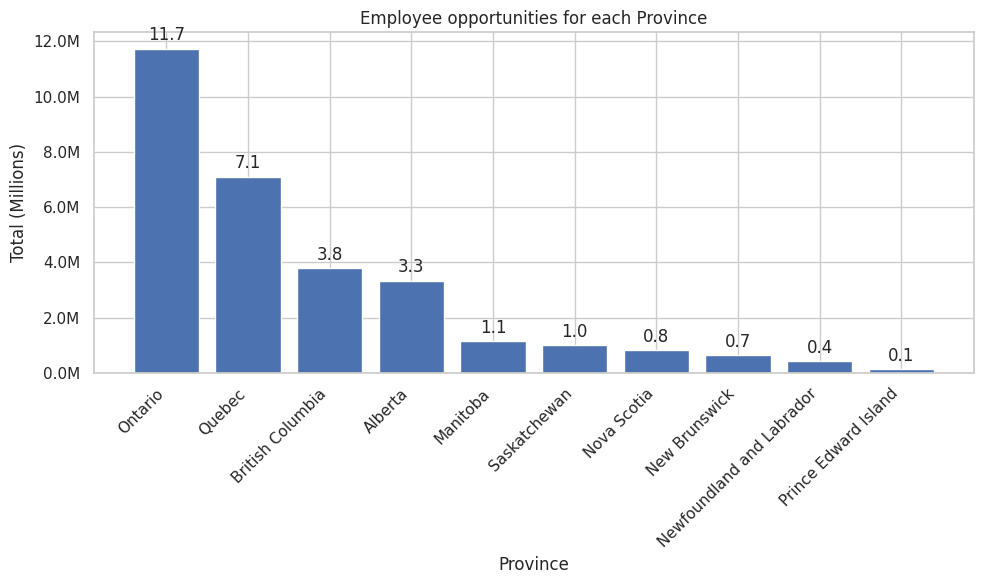

In [113]:
df_perProvince = df_perProvince.sort_values(by='Total', ascending=False)
df_perProvince['Total'] = df_perProvince['Total'] / 1e6

plt.figure(figsize=(10, 6))

bars = plt.bar(df_perProvince['Province'], df_perProvince['Total'])

plt.xlabel('Province')
plt.ylabel('Total (Millions)')
plt.title('Employee opportunities for each Province')

plt.xticks(rotation=45, ha='right')

def millions_format(x, pos):
    return f'{x:.1f}M'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_format))

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


This table displays the total number of jobs that have been available over the years by province.

In [114]:
df_graduated = pd.read_csv("/content/drive/MyDrive/Yael/DEV/0. Projects-Data/7. Jobs-Graduated Canada/Graduates_perProvince_2000_2020.csv")

In [115]:
df_graduated.head(3)

,Province,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Canada,"317,844","322,884","338,469","357,933","376,401","377,370","389,949","410,613","406,089",...,"467,037","478,845","504,252","519,180","533,910","531,672","543,525","564,726","586,959","590,343"
1,Newfoundland and Labrador,"4,035","4,182","4,440","4,338","5,283","4,620","5,799","6,030","5,946",...,"6,630","6,480","6,549","6,573","6,249","6,447","6,393","6,057","5,751","5,817"
2,Prince Edward Island,"1,680","1,683","1,311","1,593","1,728","1,530","1,599","1,758","1,836",...,"2,208","2,085","2,193","2,376","2,085","2,127","2,034","2,127","1,995","2,109"


In [116]:
df_graduated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Province  12 non-null     object
 1   2000      12 non-null     object
 2   2001      12 non-null     object
 3   2002      12 non-null     object
 4   2003      12 non-null     object
 5   2004      12 non-null     object
 6   2005      12 non-null     object
 7   2006      12 non-null     object
 8   2007      12 non-null     object
 9   2008      12 non-null     object
 10  2009      12 non-null     object
 11  2010      12 non-null     object
 12  2011      12 non-null     object
 13  2012      12 non-null     object
 14  2013      12 non-null     object
 15  2014      12 non-null     object
 16  2015      12 non-null     object
 17  2016      12 non-null     object
 18  2017      12 non-null     object
 19  2018      12 non-null     object
 20  2019      12 non-null     object
 21  2020      12 non-n

In [117]:
year_columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for col in year_columns:
    df_graduated[col] = df_graduated[col].replace(',', '', regex=True).astype(int)


df_graduated.head(3)


,Province,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Canada,317844,322884,338469,357933,376401,377370,389949,410613,406089,...,467037,478845,504252,519180,533910,531672,543525,564726,586959,590343
1,Newfoundland and Labrador,4035,4182,4440,4338,5283,4620,5799,6030,5946,...,6630,6480,6549,6573,6249,6447,6393,6057,5751,5817
2,Prince Edward Island,1680,1683,1311,1593,1728,1530,1599,1758,1836,...,2208,2085,2193,2376,2085,2127,2034,2127,1995,2109


In [118]:
df_jobs = df_acrosstime[df_acrosstime['year'] == 2019]
df_jobs.drop('year', axis=1, inplace=True)
df_jobs = df_jobs.T
df_jobs.reset_index(inplace=True)
df_jobs.columns = ['Province', 'Total_Jobs']
df_jobs['Total_Jobs'] = df_jobs['Total_Jobs'].astype(int)
df_jobs

<ipython-input-118-e62cb6821bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs.drop('year', axis=1, inplace=True)


,Province,Total_Jobs
0,Alberta,103092
1,British Columbia,112663
2,Manitoba,28755
3,New Brunswick,15689
4,Newfoundland and Labrador,10009
5,Nova Scotia,20507
6,Ontario,327263
7,Prince Edward Island,3414
8,Quebec,190799
9,Saskatchewan,25523


In [119]:
df_grad = df_graduated[['Province', '2019']]
df_grad.columns = ['Province', 'Total_Graduated']
df_grad

,Province,Total_Graduated
0,Canada,586959
1,Newfoundland and Labrador,5751
2,Prince Edward Island,1995
3,Nova Scotia,15579
4,New Brunswick,7968
5,Quebec,150945
6,Ontario,262086
7,Manitoba,13158
8,Saskatchewan,11214
9,Alberta,45960


##Jobs vs Graduates

Now, a comparison will be made between the total number of available jobs and the total number of graduates from higher education or technical programs.

It's important to emphasize a crucial point: a common and convenient route for immigration to Canada is through education. After completing higher education (technical, university, or college studies), international students are granted a work permit as graduates, which can earn them points for obtaining permanent residency and eventual immigration.

As a result, a portion of the graduates from these institutions are the same individuals occupying the showcased job positions.

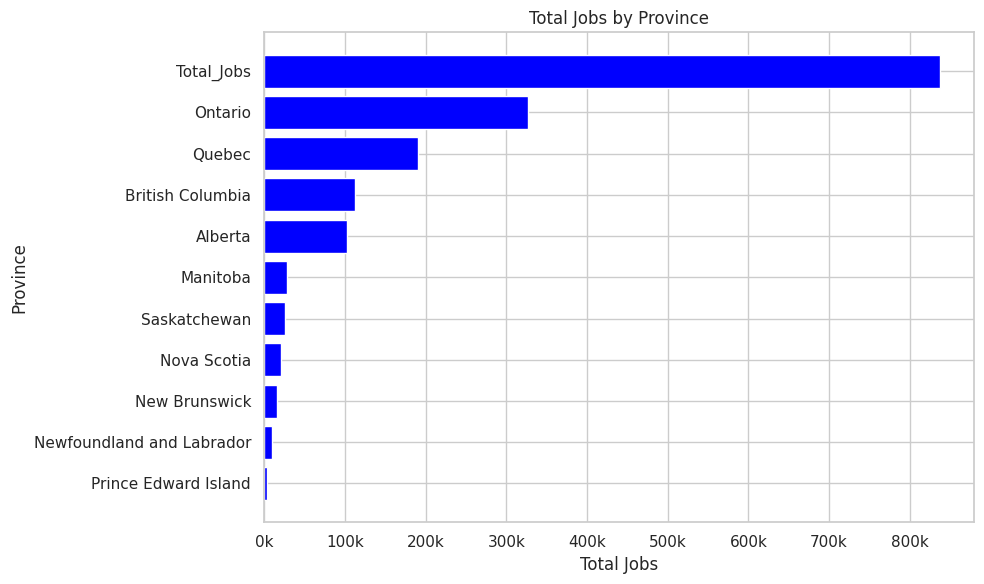

In [120]:
df_sorted = df_jobs.sort_values(by='Total_Jobs', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Province'], df_sorted['Total_Jobs'], color='blue')
plt.xlabel('Total Jobs')
plt.ylabel('Province')
plt.title('Total Jobs by Province')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()

plt.show()

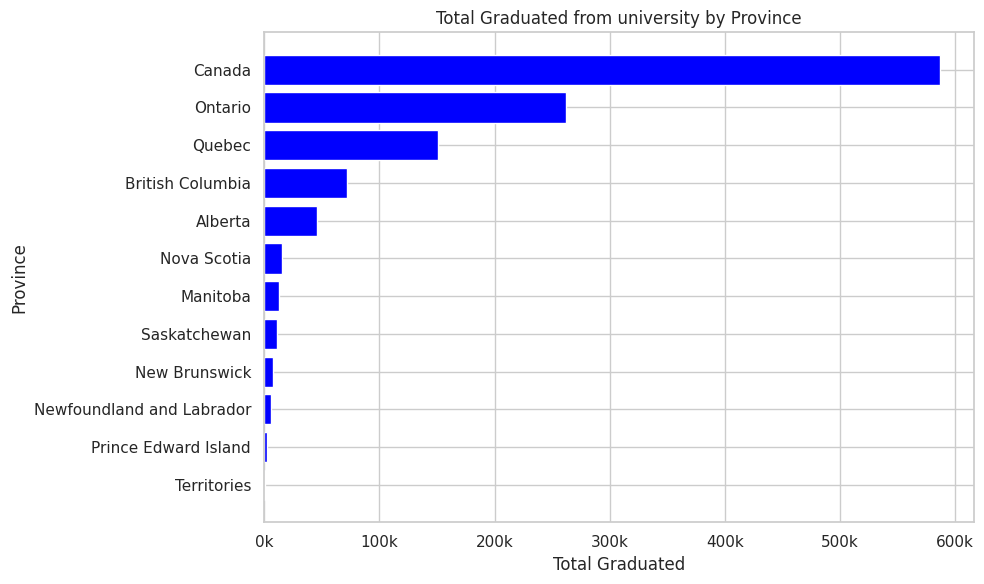

In [121]:
df_sorted = df_grad.sort_values(by='Total_Graduated', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Province'], df_sorted['Total_Graduated'], color='blue')
plt.xlabel('Total Graduated')
plt.ylabel('Province')
plt.title('Total Graduated from university by Province')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()

plt.show()

In [122]:
merged_df = pd.merge(df_jobs, df_grad, on='Province')
merged_df

,Province,Total_Jobs,Total_Graduated
0,Alberta,103092,45960
1,British Columbia,112663,71682
2,Manitoba,28755,13158
3,New Brunswick,15689,7968
4,Newfoundland and Labrador,10009,5751
5,Nova Scotia,20507,15579
6,Ontario,327263,262086
7,Prince Edward Island,3414,1995
8,Quebec,190799,150945
9,Saskatchewan,25523,11214


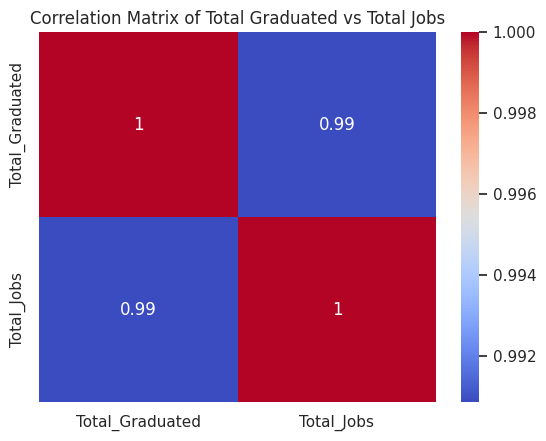

In [123]:
correlation_matrix = merged_df[['Total_Graduated', 'Total_Jobs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Total Graduated vs Total Jobs')
plt.show()


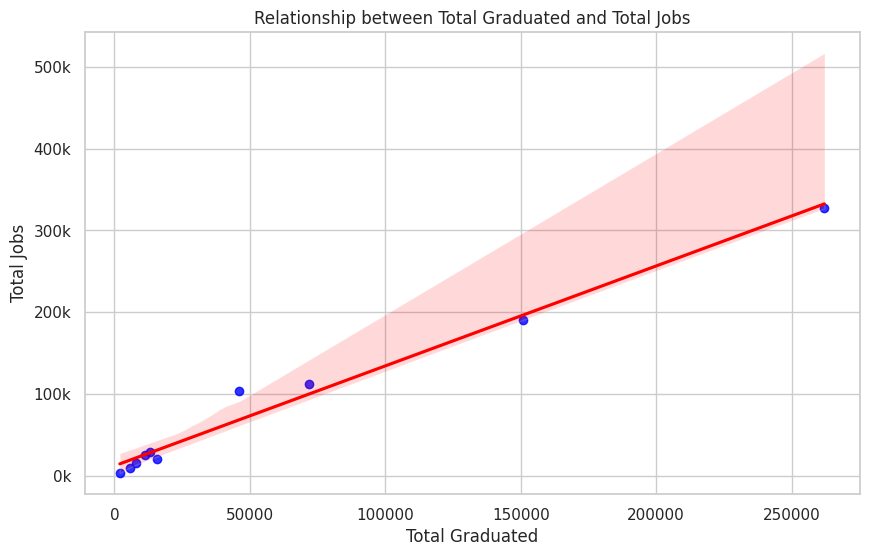

In [124]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

merged_df_long = merged_df.melt(id_vars=['Province'], value_vars=['Total_Graduated', 'Total_Jobs'],
                                var_name='Category', value_name='Count')

def format_thousands(x, pos):
    return f'{x / 1000:.0f}k'

sns.regplot(x='Total_Graduated', y='Total_Jobs', data=merged_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Total Graduated')
plt.ylabel('Total Jobs')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_thousands))

plt.title('Relationship between Total Graduated and Total Jobs')
plt.grid(True)
plt.show()

Relationship between job growth and increase in graduates

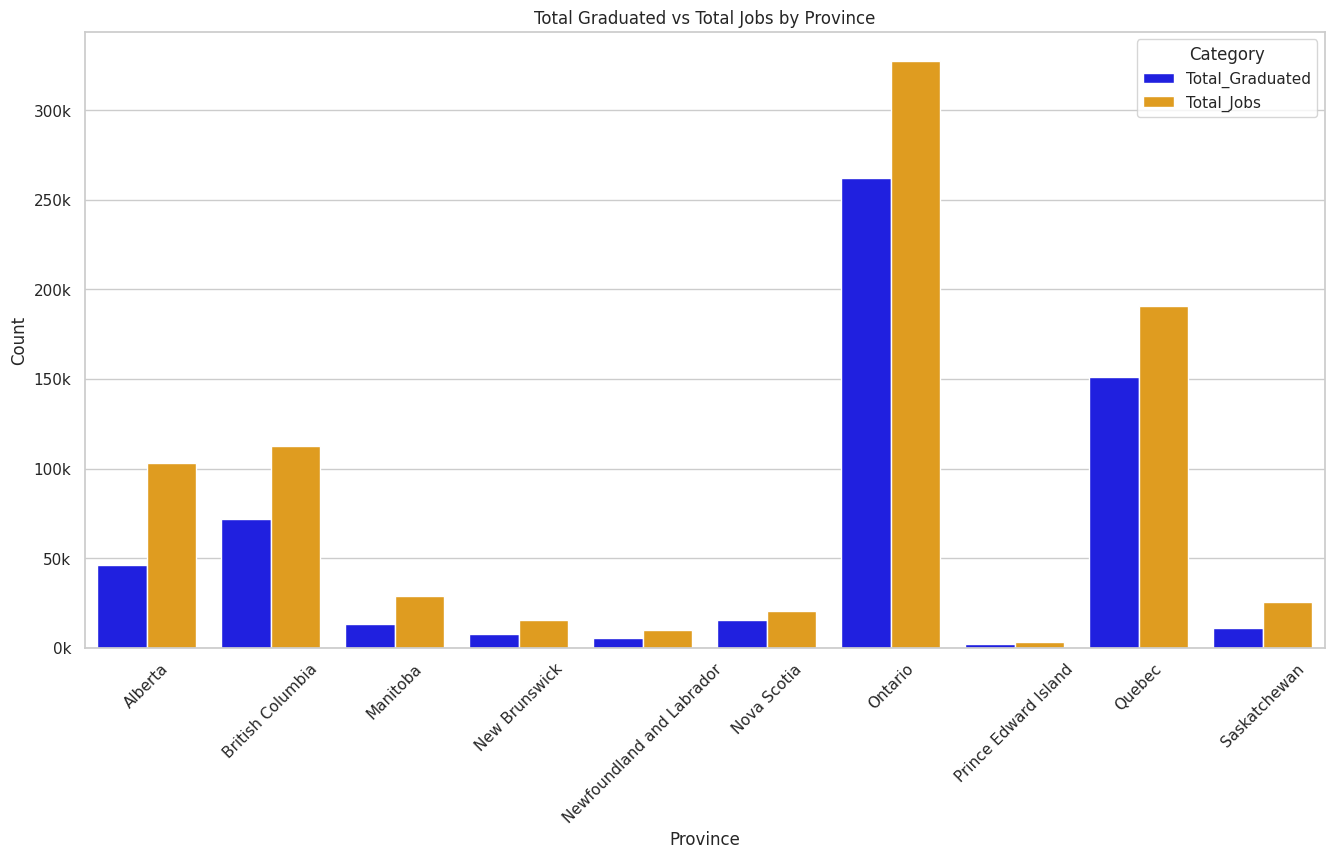

In [125]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

merged_df_long = merged_df.melt(id_vars=['Province'], value_vars=['Total_Graduated', 'Total_Jobs'],
                                var_name='Category', value_name='Count')

def format_thousands(x, pos):
    return f'{x / 1000:.0f}k'

sns.barplot(x='Province', y='Count', hue='Category', data=merged_df_long,
            palette=['blue', 'orange'])

plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Total Graduated vs Total Jobs by Province')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_thousands))

plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


The previous graph presents a comparison between the total number of jobs and the total number of graduates. However, at first glance, this might suggest that graduates constitute the majority of the workforce. In reality, this is not the case. The graduates will enter the job market in the following year, meaning that the graph doesn't illustrate how many jobs are currently held by recent graduates. Instead, it indicates which provinces are likely to experience economic and labor growth due to the influx of newly skilled individuals.

Returning to the initial point, the province that appears most promising is **Ontario**. Over the years, it has demonstrated consistent growth and is presently leading in both job availability and graduates. This suggests that its numbers will continue to rise in the upcoming year.

Source:

Jobs:
https://www.kaggle.com/code/kairatadiya/cannada-employment-analysis/input

Graduated:
https://www.statista.com/statistics/449081/postsecondary-graduates-in-canada-by-gender/

Graduated by province:


*   https://www.statista.com/statistics/449012/postsecondary-graduates-in-canada-by-province/

*   https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3710002001#timeframe
